<a href="https://colab.research.google.com/github/adibhatt/air_quality_model/blob/main/AQIPredictionsem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
dataset=pd.read_csv('city_day.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
dataset = dataset.drop(columns=['City','Date'])

In [ ]:
dataset = dataset[dataset['AQI'].isna()==False] #dropping the values where AQI is not given
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24172 non-null  float64
 1   PM10        17764 non-null  float64
 2   NO          24463 non-null  float64
 3   NO2         24459 non-null  float64
 4   NOx         22993 non-null  float64
 5   NH3         18314 non-null  float64
 6   CO          24405 non-null  float64
 7   SO2         24245 non-null  float64
 8   O3          24043 non-null  float64
 9   Benzene     21315 non-null  float64
 10  Toluene     19024 non-null  float64
 11  Xylene      9478 non-null   float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(1)
memory usage: 2.8+ MB


In [ ]:
columns_to_remove_null_rows = [i for i in dataset.columns if dataset[i].isna().sum()/dataset.shape[0]<=0.1 and dataset[i].isna().sum()>0] #if columns which has more than 10% values missing make a list of them

columns_to_impute = [i for i in dataset.columns if i not in columns_to_remove_null_rows and dataset[i].isna().sum()>0] #columns which have null values but are not in the above list and will be imputed

print("Columns in which rows will be removed:", columns_to_remove_null_rows)
print("Columns which will be imputed:", columns_to_impute)

Columns in which rows will be removed: ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']
Columns which will be imputed: ['PM10', 'NH3', 'Benzene', 'Toluene', 'Xylene']


In [ ]:
from sklearn.impute import SimpleImputer

def remove_rows(data, column):
  return data[data[column].isna()==False] #returning the dataset for which the given column does not have na values

for i in columns_to_remove_null_rows:
  dataset = remove_rows(dataset, i)

imputer = SimpleImputer()
dataset[columns_to_impute] = imputer.fit_transform(dataset[columns_to_impute]) #Imputing the columns with values

dataset.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,83.13,118.180852,6.93,28.71,33.72,24.96941,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,79.84,118.180852,13.85,28.68,41.08,24.96941,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,94.52,118.180852,24.39,32.66,52.61,24.96941,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,135.99,118.180852,43.48,42.08,84.57,24.96941,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,178.33,118.180852,54.56,35.31,72.80,24.96941,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [ ]:
dataset.isna().sum()/dataset.shape[0] #checking if the dataset has any null values remaining for every column

PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 28 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       21592 non-null  float64
 1   PM10        21592 non-null  float64
 2   NO          21592 non-null  float64
 3   NO2         21592 non-null  float64
 4   NOx         21592 non-null  float64
 5   NH3         21592 non-null  float64
 6   CO          21592 non-null  float64
 7   SO2         21592 non-null  float64
 8   O3          21592 non-null  float64
 9   Benzene     21592 non-null  float64
 10  Toluene     21592 non-null  float64
 11  Xylene      21592 non-null  float64
 12  AQI         21592 non-null  float64
 13  AQI_Bucket  21592 non-null  object 
dtypes: float64(13), object(1)
memory usage: 2.5+ MB


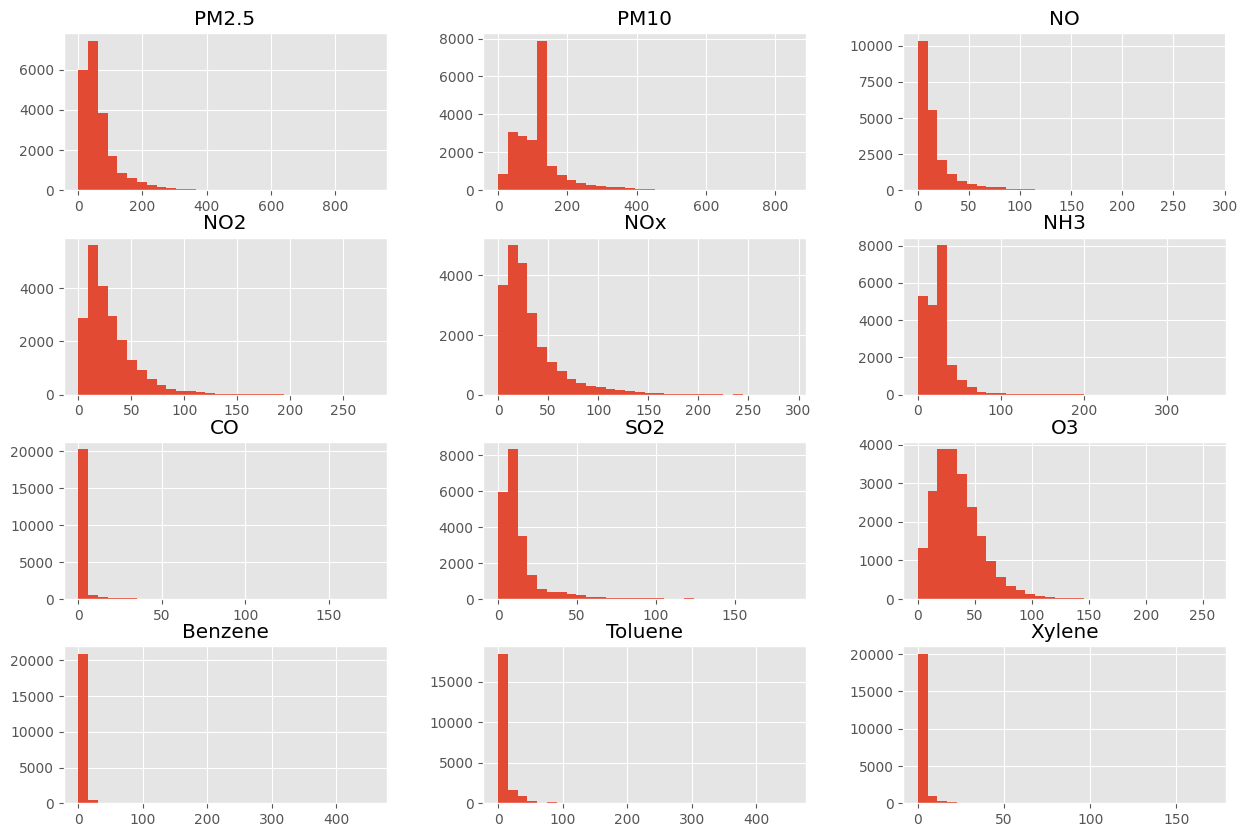

In [ ]:
dataset[[i for i in dataset.columns if i not in ["AQI_Bucket","AQI"]]].hist(bins=30, figsize=(15, 10))
plt.show()

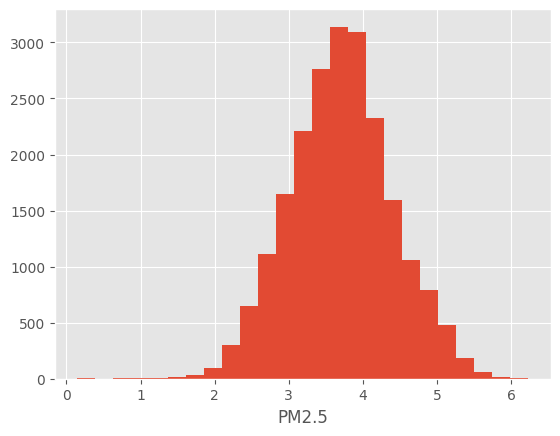

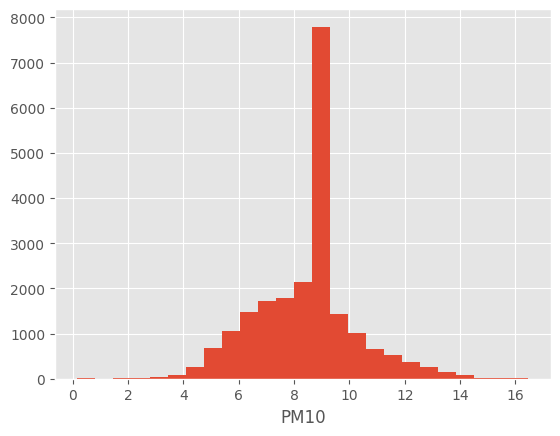

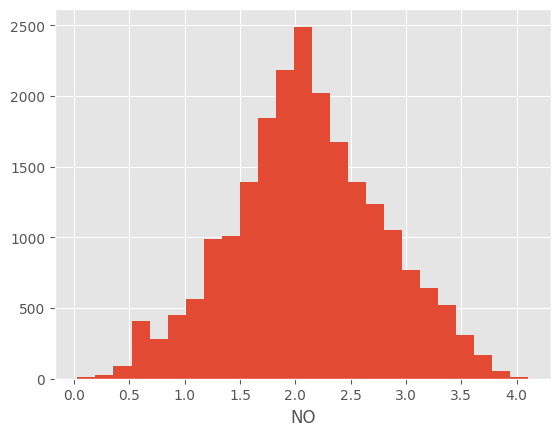

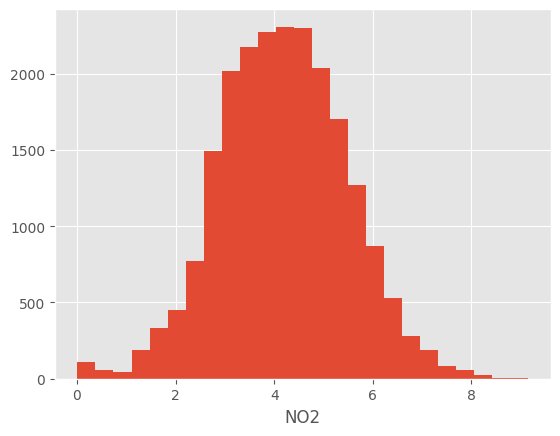

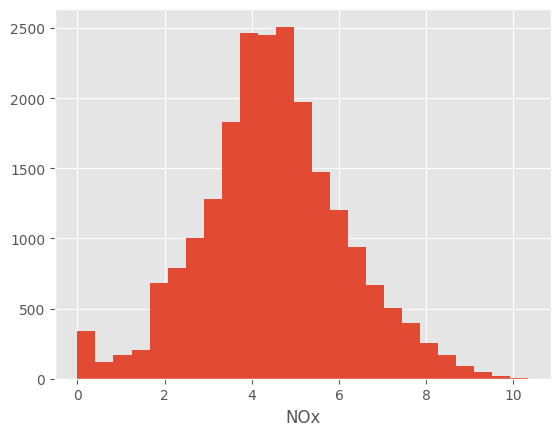

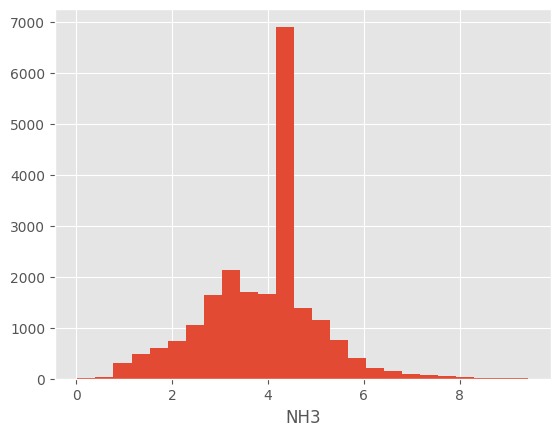

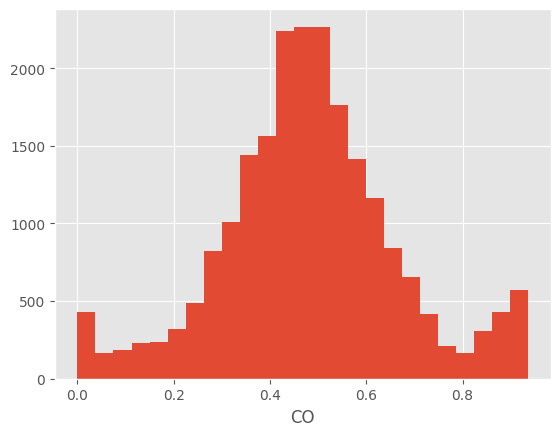

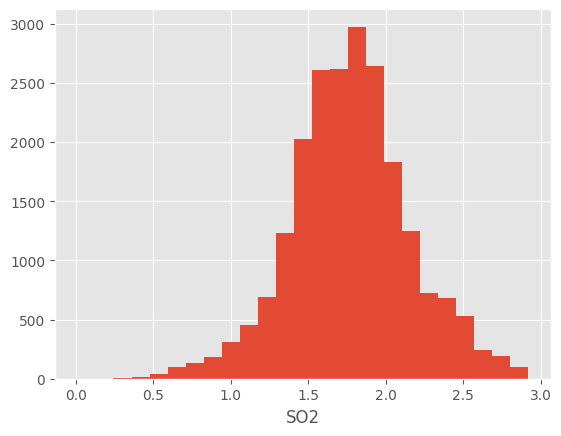

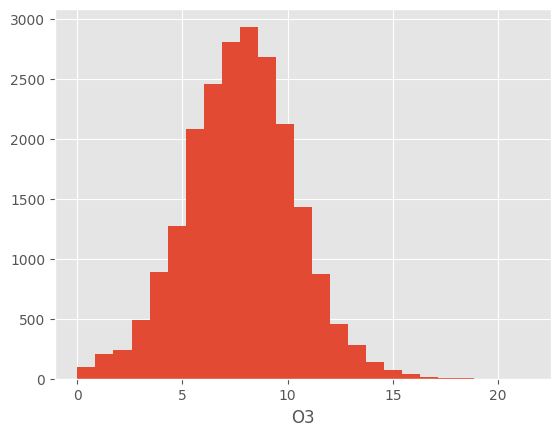

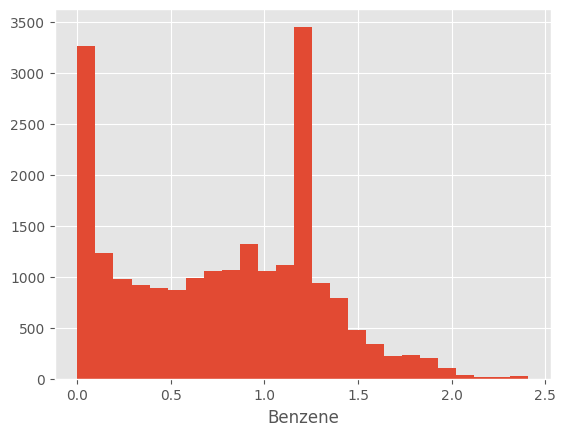

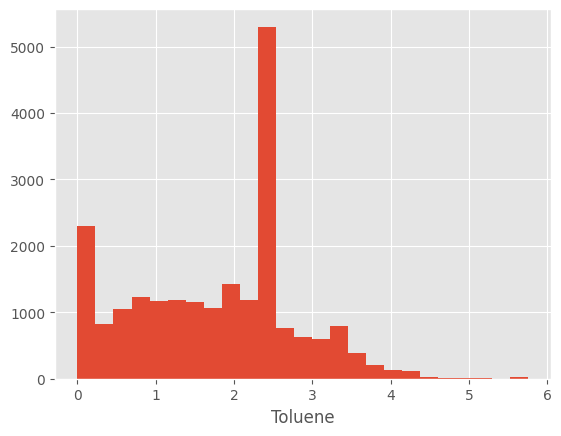

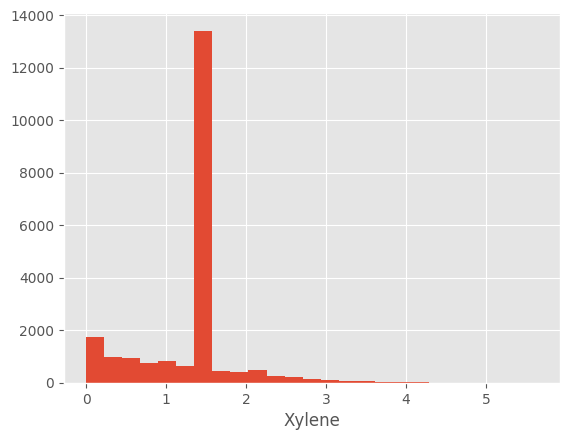

In [ ]:
#Applying the Yeo Johnson transformation we will stabilize the vairance of the data and transform it to have a normal distribution which might help in prediction

import scipy.stats as stats

dataset_yeo_test = dataset[[i for i in dataset.columns if i not in ["AQI_Bucket","AQI"]]].copy()

for i in dataset_yeo_test.columns:
  yeo_t,param = stats.yeojohnson(dataset_yeo_test[i])
  plt.hist(yeo_t,bins=25, )
  plt.xlabel(i)
  plt.show()


In [ ]:
columns_to_binarize = ['Benzene','Toluene','Xylene'] #we decided to binarize them because yeo johnson was not helpful in normalizing them
columns_to_yeo = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']

print('Columns to binarize:',columns_to_binarize)
print('Columns to yeo transform: ', columns_to_yeo)

Columns to binarize: ['Benzene', 'Toluene', 'Xylene']
Columns to yeo transform:  ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']


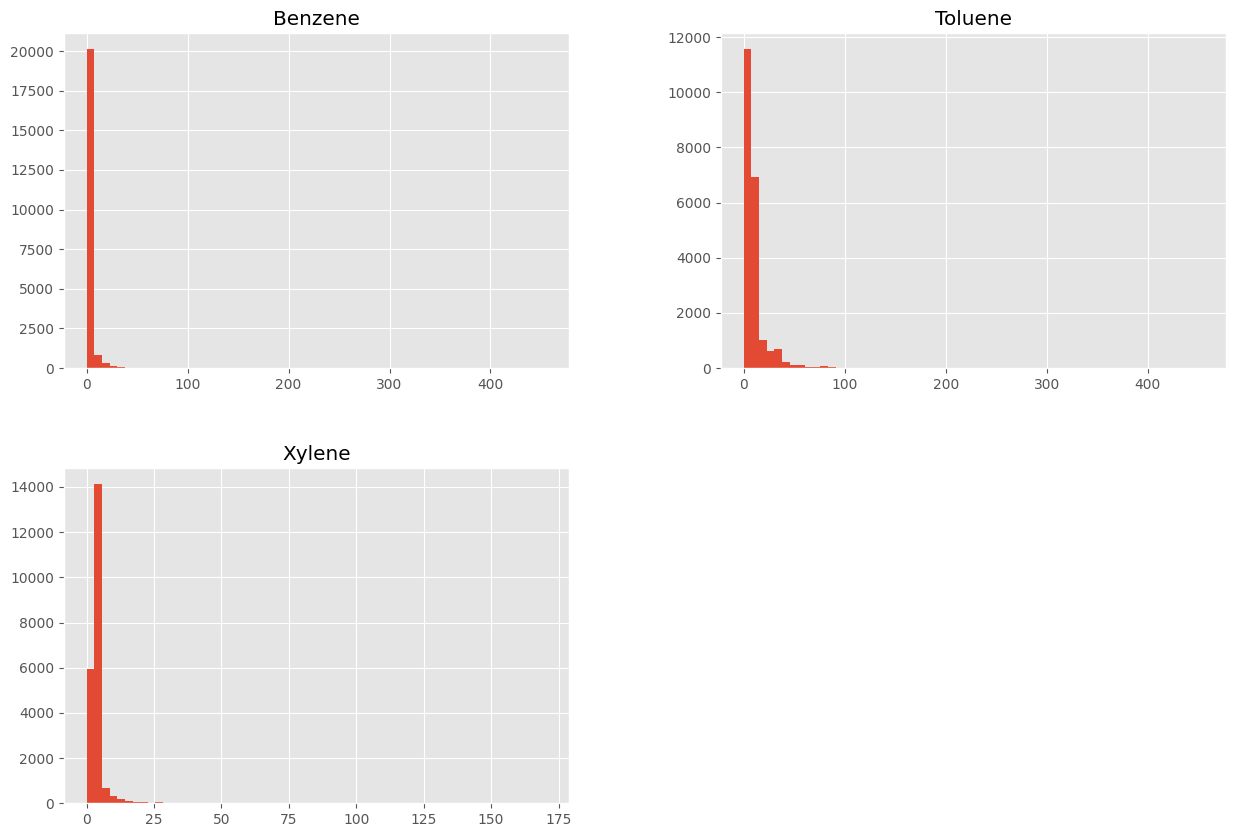

In [ ]:
dataset[columns_to_binarize].hist(bins=60, figsize=(15, 10))
plt.show()


In [ ]:
binarize_threshold = {
    'Benzene' : 30,
    'Xylene' : 30,
    'Toluene' : 30,
}

def binarize(value, thresold):
  if value<=thresold:
    return 0
  return 1

for col in columns_to_binarize:
  new_col = col+"_binarized"
  dataset[new_col] = dataset[col].apply(lambda x: binarize(x, binarize_threshold[col]))

dataset.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Benzene_binarized,Toluene_binarized,Xylene_binarized
28,83.13,118.180852,6.93,28.71,33.72,24.96941,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor,0,0,0
29,79.84,118.180852,13.85,28.68,41.08,24.96941,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor,0,0,0
30,94.52,118.180852,24.39,32.66,52.61,24.96941,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe,0,0,0
31,135.99,118.180852,43.48,42.08,84.57,24.96941,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe,0,0,0
32,178.33,118.180852,54.56,35.31,72.80,24.96941,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe,0,0,1


In [ ]:
yeo_transform_params = {}

for col in columns_to_yeo:
  yeo_t,param = stats.yeojohnson(dataset_yeo_test[col])
  yeo_transform_params[col] = param
  dataset[col] = yeo_t

dataset.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Benzene_binarized,Toluene_binarized,Xylene_binarized
28,4.178386,8.818748,1.832736,4.509052,5.094131,4.204796,0.836386,2.501178,10.726404,0.02,0.00,3.14,209.0,Poor,0,0,0
29,4.142958,8.818748,2.303657,4.507310,5.482637,4.204796,0.887014,2.493421,13.588157,0.04,0.00,4.81,328.0,Very Poor,0,0,0
30,4.290898,8.818748,2.679013,4.726492,5.992967,4.204796,0.910212,2.610749,14.507537,0.24,0.01,7.67,514.0,Severe,0,0,0
31,4.608320,8.818748,3.046326,5.169359,7.048522,4.204796,0.923763,2.648040,13.959982,0.40,0.04,25.87,782.0,Severe,0,0,0
32,4.843410,8.818748,3.185308,4.860645,6.704120,4.204796,0.927264,2.539631,14.260111,0.46,0.06,35.61,914.0,Severe,0,0,1


In [ ]:
yeo_transform_params #these params can be used to apply transformation on future incoming data and also to reverse the transformation if needed

{'PM2.5': -0.026893063267765607,
 'PM10': 0.23448117542164032,
 'NO': -0.1203892296507965,
 'NO2': 0.16068251821046106,
 'NOx': 0.19306461216459575,
 'NH3': 0.15070997294840976,
 'CO': -1.0633958776243513,
 'SO2': -0.249627316956199,
 'O3': 0.41101531529167773}

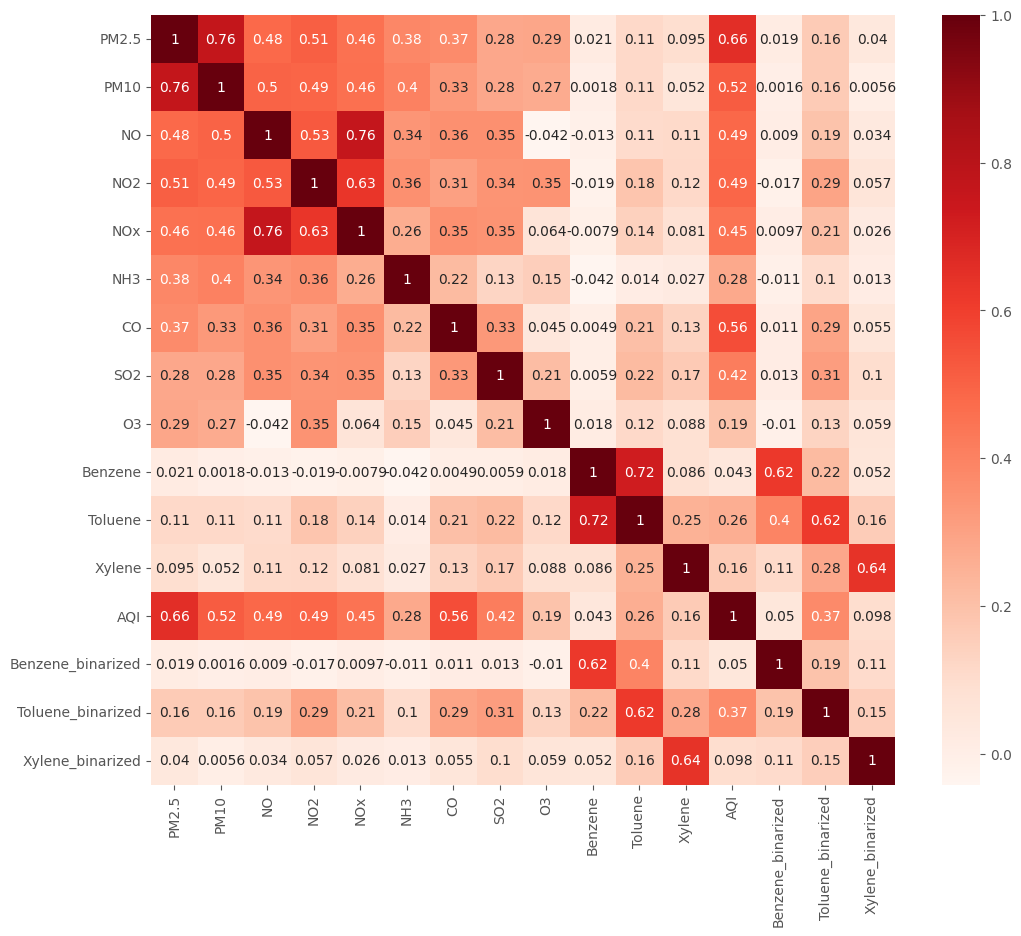

In [ ]:
import seaborn as sns

dataset_corr = dataset[[i for i in dataset.columns if i!="AQI_Bucket"]]

plt.figure(figsize=(12,10))
cor = dataset_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


Can try dropping the similar constituents like PM2.5 or PM10 because they have considerable co-relation. Might improve the model working.

In [ ]:
dataset.drop(columns = columns_to_binarize+['NOx'],inplace=True) #dropped Nox column because of high correlation


In [ ]:
dataset.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI,AQI_Bucket,Benzene_binarized,Toluene_binarized,Xylene_binarized
28,4.178386,8.818748,1.832736,4.509052,4.204796,0.836386,2.501178,10.726404,209.0,Poor,0,0,0
29,4.142958,8.818748,2.303657,4.507310,4.204796,0.887014,2.493421,13.588157,328.0,Very Poor,0,0,0
30,4.290898,8.818748,2.679013,4.726492,4.204796,0.910212,2.610749,14.507537,514.0,Severe,0,0,0
31,4.608320,8.818748,3.046326,5.169359,4.204796,0.923763,2.648040,13.959982,782.0,Severe,0,0,0
32,4.843410,8.818748,3.185308,4.860645,4.204796,0.927264,2.539631,14.260111,914.0,Severe,0,0,1


In [ ]:
df=dataset

# **Modelling**

In [ ]:
dataset['AQI'] = np.log(dataset['AQI'])
dataset.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI,AQI_Bucket,Benzene_binarized,Toluene_binarized,Xylene_binarized
28,4.178386,8.818748,1.832736,4.509052,4.204796,0.836386,2.501178,10.726404,5.342334,Poor,0,0,0
29,4.142958,8.818748,2.303657,4.507310,4.204796,0.887014,2.493421,13.588157,5.793014,Very Poor,0,0,0
30,4.290898,8.818748,2.679013,4.726492,4.204796,0.910212,2.610749,14.507537,6.242223,Severe,0,0,0
31,4.608320,8.818748,3.046326,5.169359,4.204796,0.923763,2.648040,13.959982,6.661855,Severe,0,0,0
32,4.843410,8.818748,3.185308,4.860645,4.204796,0.927264,2.539631,14.260111,6.817831,Severe,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset[[i for i in dataset.columns if i not in ["AQI","AQI_Bucket"]]],
    dataset["AQI"],
    test_size=0.2,
    random_state=100
    )

X_train.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene_binarized,Toluene_binarized,Xylene_binarized
4215,3.021601,6.480093,2.454278,3.012698,3.141431,0.384683,1.569540,6.416450,0,0,0
20234,5.106237,8.818748,2.186074,2.827803,4.204796,0.635040,1.718645,7.399535,0,0,0
16997,3.743003,8.927164,2.010235,3.582647,2.460866,0.292701,1.792167,5.879300,0,0,0
104,4.298734,8.818748,2.479503,4.359783,4.204796,0.899340,1.954206,8.943845,0,0,0
5507,3.516772,8.818748,1.379462,4.057023,4.204796,0.467825,1.499185,8.775373,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

X_train.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene_binarized,Toluene_binarized,Xylene_binarized
0,-0.987730,-1.079136,0.513935,-0.911308,-0.591963,-0.528226,-0.527961,-0.528941,-0.091044,-0.270784,-0.055478
1,2.018265,0.227184,0.121795,-1.055474,0.312066,0.838722,-0.139739,-0.147103,-0.091044,-0.270784,-0.055478
2,0.052515,0.287743,-0.135299,-0.466910,-1.170553,-1.030446,0.051689,-0.737574,-0.091044,-0.270784,-0.055478
3,0.853865,0.227184,0.550815,0.139035,0.312066,2.281801,0.473587,0.452719,-0.091044,-0.270784,-0.055478
4,-0.273706,0.227184,-1.057552,-0.097031,0.312066,-0.074268,-0.711143,0.387283,-0.091044,-0.270784,-0.055478


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
Y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.04201155772570954
R-squared (R2) Score: 0.9073299058097912


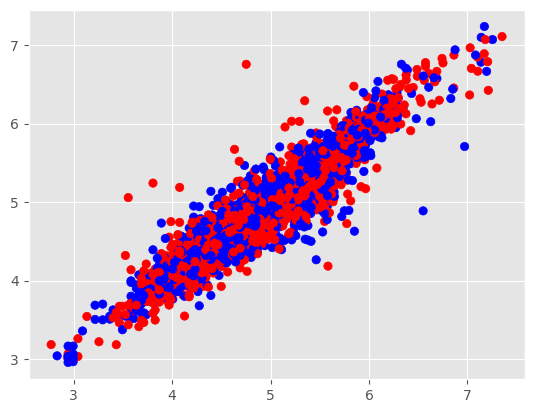

In [ ]:
x = np.random.randn(4319)
y = np.random.randn(4319)
colors = ['red' if x > 0 else 'blue' for x in x]

plt.scatter(y_test, Y_pred, c= colors)

Initial Mean Squared Error: 0.0420


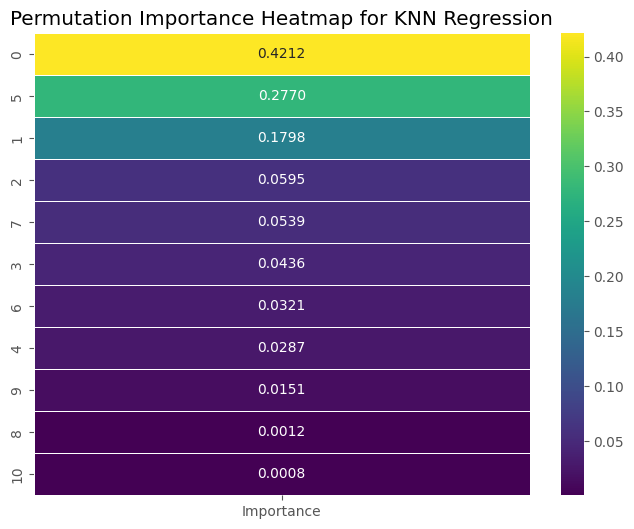

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance


initial_mse = mean_squared_error(y_test, knn.predict(X_test))
print(f"Initial Mean Squared Error: {initial_mse:.4f}")


perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

Z= dataset[[i for i in dataset.columns if i not in ["AQI","AQI_Bucket"]]]

feature_names = Z.columns.tolist()

perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(perm_importance_df[['Importance']], annot=True, fmt=".4f", cmap='viridis', linewidths=.5)
plt.title('Permutation Importance Heatmap for KNN Regression')
plt.show()


# We can remove the Benzene binarized and Xylene binarized features because their magnitude of importance is less